<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [198]:
df = pd.read_csv('../data/states_edu.csv')



Chosen test: **<hit `Enter` to edit>**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [199]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)




df.dropna(subset=['INSTRUCTION_EXPENDITURE'], inplace=True)
df.dropna(subset=['SUPPORT_SERVICES_EXPENDITURE'], inplace=True)
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
df.ENROLL_ALL_EST = df.ENROLL_ALL_EST.fillna(df.ENROLL_ALL)


<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [200]:
#

df['INST_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL_EST']
df['SUPPORT_SERVICES_EXPENDITURE_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL_EST']


#


Final feature list: **<LIST FEATURES HERE\>** 
Instruction Expenditure per student,
Support Services Expenditure per student


Feature selection justification: **<BRIEFLY DESCRIBE WHY YOU PICKED THESE FEATURES\>**
I am interested in seeing the relationship between the amount of money per student a state government spends on instruction to students' average math scores.

I would also like to see if there is a similar relationship between money spent per student on support services. Seeing if there is a correlation between these can help governments in deciding the best way to allocate money towards each student.

<h2> EDA </h2>


Visualization 1

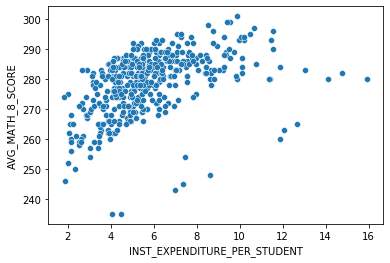

In [201]:
sns.scatterplot(data=df, x='INST_EXPENDITURE_PER_STUDENT', y = 'AVG_MATH_8_SCORE')

Instruction Expenditure/Student vs Average Math 8 Score

Visualization 2

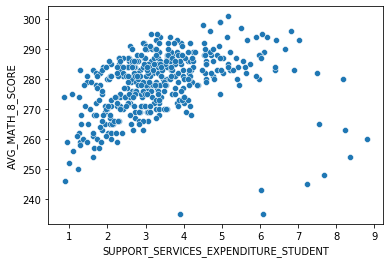

In [202]:
sns.scatterplot(data=df, x='SUPPORT_SERVICES_EXPENDITURE_STUDENT', y = 'AVG_MATH_8_SCORE')

Support Services Expenditure/Student vs Average Math 8 Score

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
X = df[['SUPPORT_SERVICES_EXPENDITURE_STUDENT', 'INST_EXPENDITURE_PER_STUDENT']]
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [205]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.35, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [206]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [207]:
# create your model here
model = LinearRegression()

In [208]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [209]:
y_pred = model.predict(X_test)

Text(0, 0.5, 'Math 8 Score')

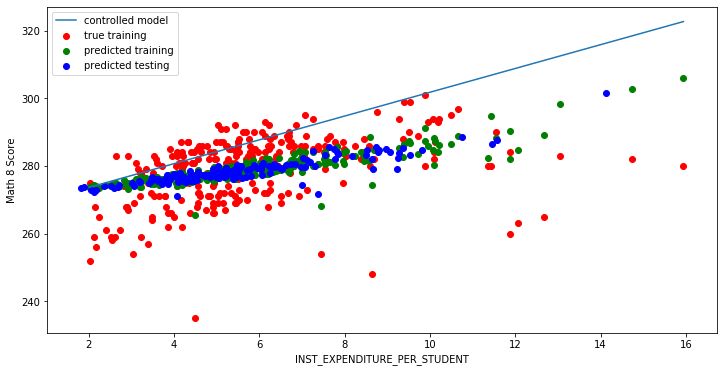

In [210]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'INST_EXPENDITURE_PER_STUDENT'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')

<h2> Summary </h2>

For the linear regression model, the features of Instruction Expenditure/student and Support Services Expenditure were chosen as the input variables for the regression. Then, the model was trained on 65% of the data in the dataset. Looking at the model, we can see the training points in green/red and the model's predictions using the remaining 35% of the data in blue. We also see the light blue line which is a line of best fit based on the min and max values in the INST_EXPENDITURE_PER_STUDENT column. Based on the results of the model, we can see that Instruction Expenditure/Student is correlated with higher average Math 8 scores than Support Services Expenditure/Student.